Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 5_000_000
R = 500_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 24 04:24:30 2025 +0100) (510.78ms ela...,2.54,0.00000,0.429,2.85,0.41,26.62,65.45 C,Nominal
1,(Mon Mar 24 04:24:31 2025 +0100) (508.13ms ela...,13.20,0.20500,1.360,14.59,1.53,77.74,65.68 C,Nominal
2,(Mon Mar 24 04:24:31 2025 +0100) (507.15ms ela...,11.60,0.11200,1.060,12.75,1.38,72.70,65.68 C,Nominal
3,(Mon Mar 24 04:24:32 2025 +0100) (508.78ms ela...,2.88,0.09420,0.799,3.90,1.15,71.78,65.81 C,Nominal
4,(Mon Mar 24 04:24:32 2025 +0100) (508.00ms ela...,2.15,0.00721,0.376,2.79,1.19,99.62,65.81 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(6170, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 24 04:24:42 2025 +0100) (1010.93ms el...,39.1,0.0634,1.29,42.13,3.86,99.07,64.36 C,Nominal
1,(Mon Mar 24 04:24:43 2025 +0100) (1005.78ms el...,36.4,0.5110,1.50,40.76,3.87,97.75,68.62 C,Nominal
2,(Mon Mar 24 04:24:44 2025 +0100) (1005.78ms el...,40.0,1.3200,1.43,45.02,3.97,99.32,71.77 C,Nominal
3,(Mon Mar 24 04:24:45 2025 +0100) (1005.41ms el...,36.3,0.0464,1.37,39.72,3.92,98.49,73.93 C,Nominal
4,(Mon Mar 24 04:24:46 2025 +0100) (1004.49ms el...,36.7,0.1670,1.54,40.48,3.88,97.84,76.36 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 19:18:33 2025 +0100) (509.28ms ela...,13.700,0.0561,1.060,15.03,1.92,98.63,52.00 C,Nominal
1,(Sun Mar 23 19:18:34 2025 +0100) (504.55ms ela...,18.000,0.1460,1.240,21.69,2.12,92.17,52.99 C,Nominal
2,(Sun Mar 23 19:18:34 2025 +0100) (506.14ms ela...,8.520,0.1030,0.869,10.21,1.26,58.69,52.99 C,Nominal
3,(Sun Mar 23 19:18:35 2025 +0100) (508.67ms ela...,0.636,0.0370,0.458,1.20,0.44,27.73,52.95 C,Nominal
4,(Sun Mar 23 19:18:35 2025 +0100) (508.89ms ela...,0.236,0.0000,0.287,0.48,0.14,9.51,52.95 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(31226, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 19:18:45 2025 +0100) (1006.40ms el...,21.1,0.0804,1.200,23.45,2.41,96.48,54.81 C,Nominal
1,(Sun Mar 23 19:18:46 2025 +0100) (1005.39ms el...,17.8,0.0691,0.955,20.81,2.11,96.81,56.65 C,Nominal
2,(Sun Mar 23 19:18:47 2025 +0100) (1005.98ms el...,16.3,0.0211,0.787,18.86,1.94,96.20,57.82 C,Nominal
3,(Sun Mar 23 19:18:48 2025 +0100) (1005.10ms el...,18.4,0.0000,0.806,21.06,2.15,96.26,58.83 C,Nominal
4,(Sun Mar 23 19:18:49 2025 +0100) (1005.64ms el...,21.4,0.0000,0.855,24.12,2.47,96.79,60.64 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-24 04:24:30,2.54,0.00000,0.429,2.85,0.41,26.62,65.45,Nominal,510.78
1,2025-03-24 04:24:31,13.20,0.20500,1.360,14.59,1.53,77.74,65.68,Nominal,508.13
2,2025-03-24 04:24:31,11.60,0.11200,1.060,12.75,1.38,72.70,65.68,Nominal,507.15
3,2025-03-24 04:24:32,2.88,0.09420,0.799,3.90,1.15,71.78,65.81,Nominal,508.78
4,2025-03-24 04:24:32,2.15,0.00721,0.376,2.79,1.19,99.62,65.81,Nominal,508.00


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(6170, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-24 04:24:42,39.1,0.0634,1.29,42.13,3.86,99.07,64.36,Nominal,1010.93
1,2025-03-24 04:24:43,36.4,0.5110,1.50,40.76,3.87,97.75,68.62,Nominal,1005.78
2,2025-03-24 04:24:44,40.0,1.3200,1.43,45.02,3.97,99.32,71.77,Nominal,1005.78
3,2025-03-24 04:24:45,36.3,0.0464,1.37,39.72,3.92,98.49,73.93,Nominal,1005.41
4,2025-03-24 04:24:46,36.7,0.1670,1.54,40.48,3.88,97.84,76.36,Nominal,1004.49


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 19:18:33,13.700,0.0561,1.060,15.03,1.92,98.63,52.00,Nominal,509.28
1,2025-03-23 19:18:34,18.000,0.1460,1.240,21.69,2.12,92.17,52.99,Nominal,504.55
2,2025-03-23 19:18:34,8.520,0.1030,0.869,10.21,1.26,58.69,52.99,Nominal,506.14
3,2025-03-23 19:18:35,0.636,0.0370,0.458,1.20,0.44,27.73,52.95,Nominal,508.67
4,2025-03-23 19:18:35,0.236,0.0000,0.287,0.48,0.14,9.51,52.95,Nominal,508.89


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(31226, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 19:18:45,21.1,0.0804,1.200,23.45,2.41,96.48,54.81,Nominal,1006.40
1,2025-03-23 19:18:46,17.8,0.0691,0.955,20.81,2.11,96.81,56.65,Nominal,1005.39
2,2025-03-23 19:18:47,16.3,0.0211,0.787,18.86,1.94,96.20,57.82,Nominal,1005.98
3,2025-03-23 19:18:48,18.4,0.0000,0.806,21.06,2.15,96.26,58.83,Nominal,1005.10
4,2025-03-23 19:18:49,21.4,0.0000,0.855,24.12,2.47,96.79,60.64,Nominal,1005.64


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


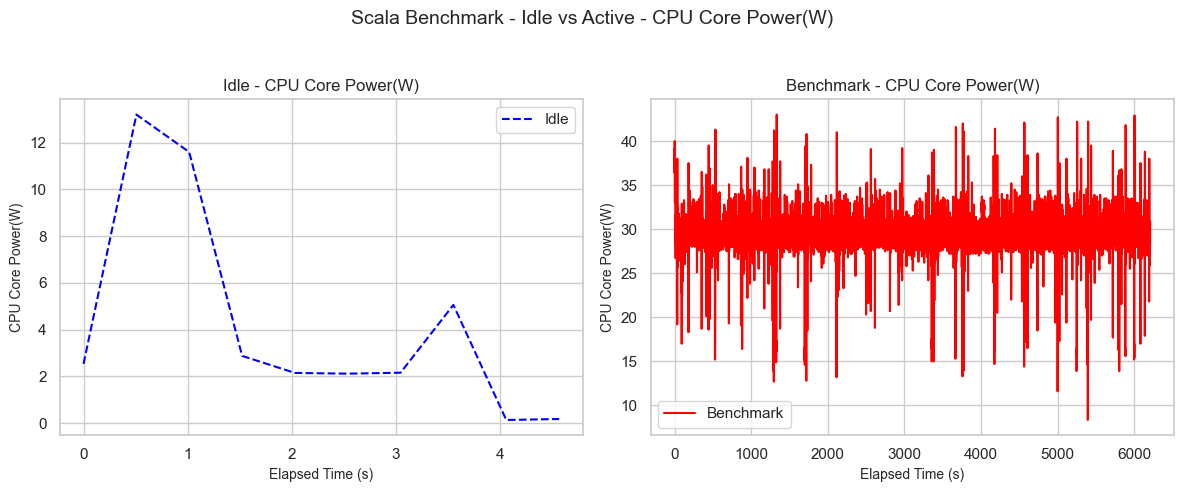

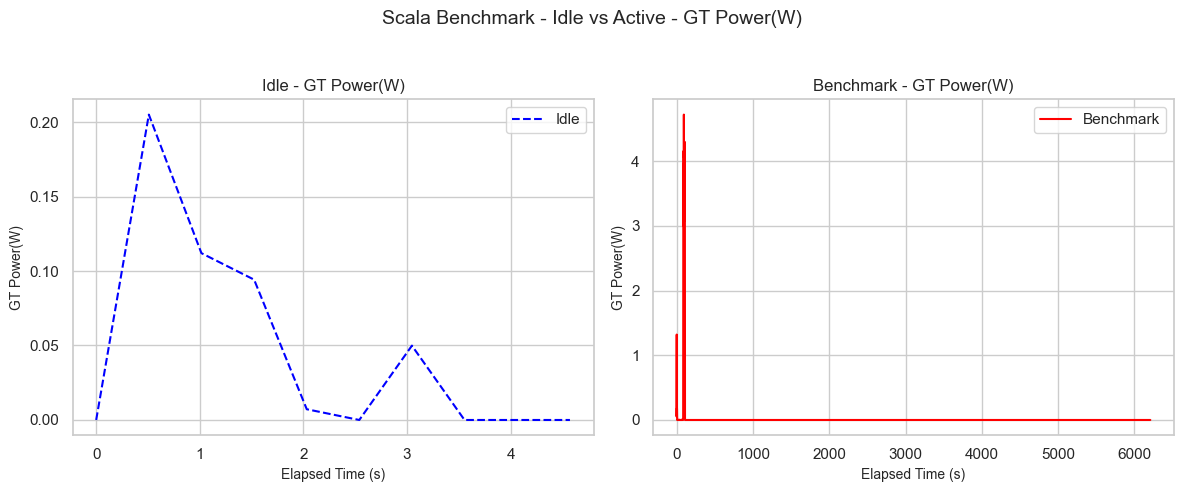

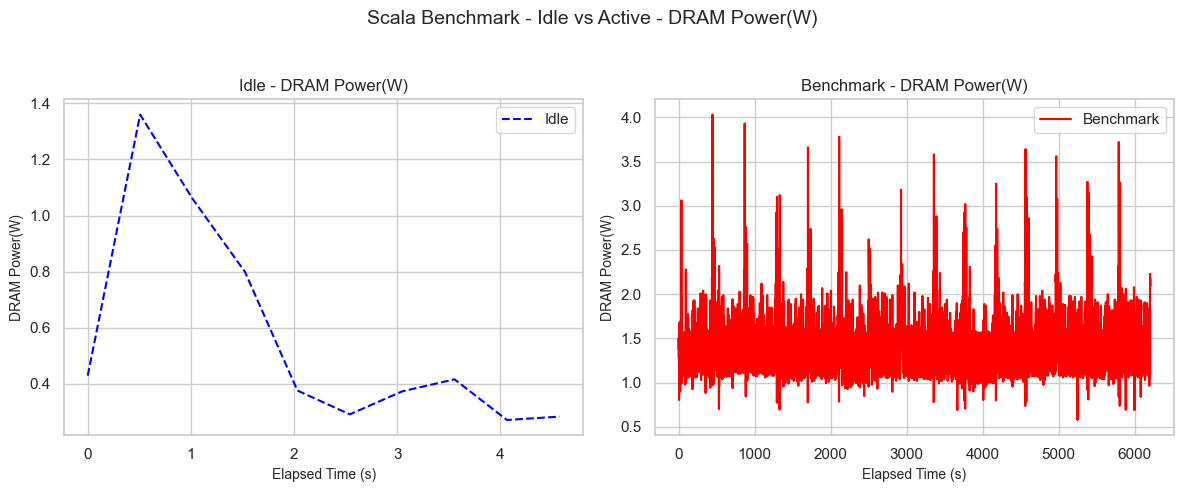

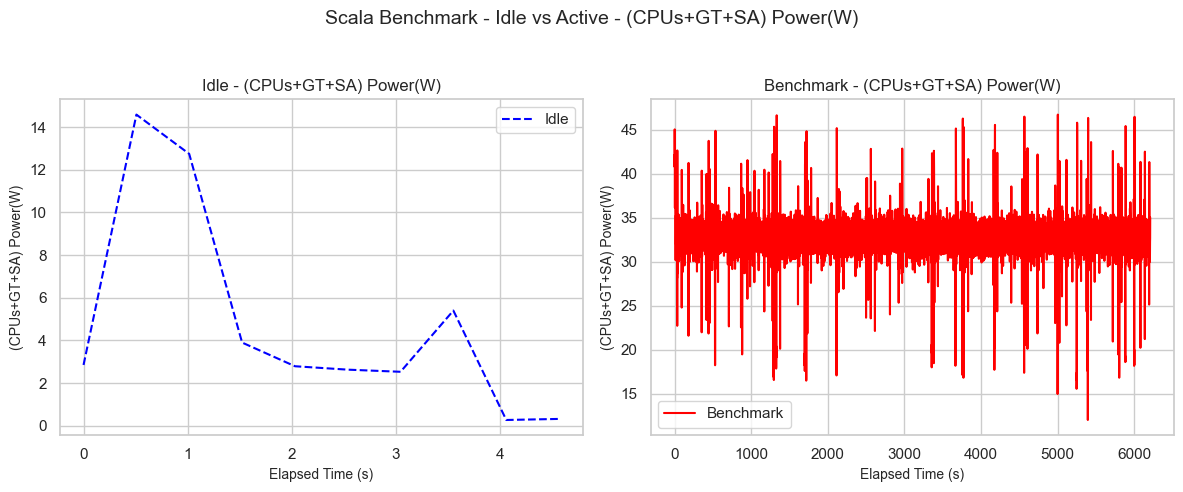

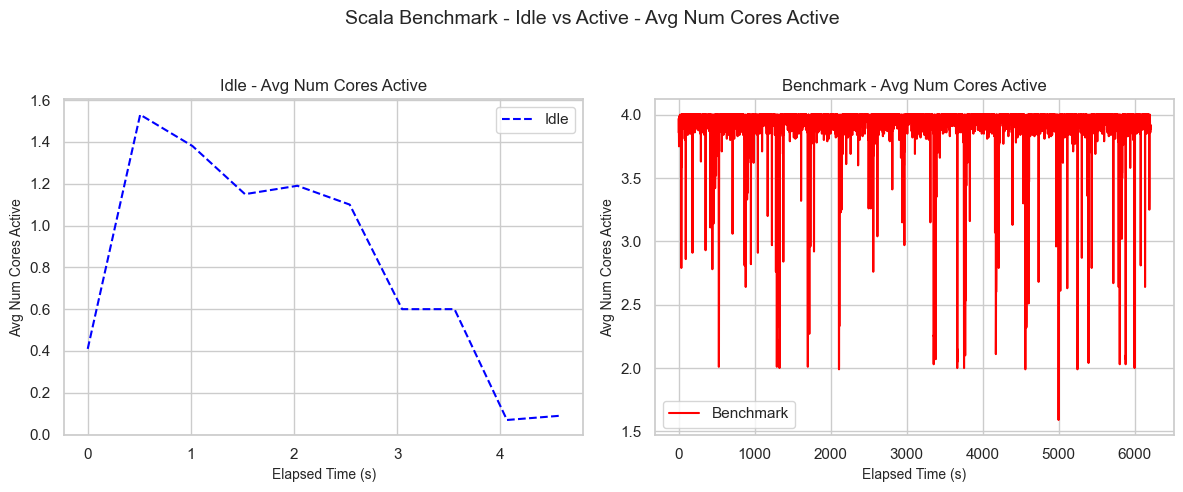

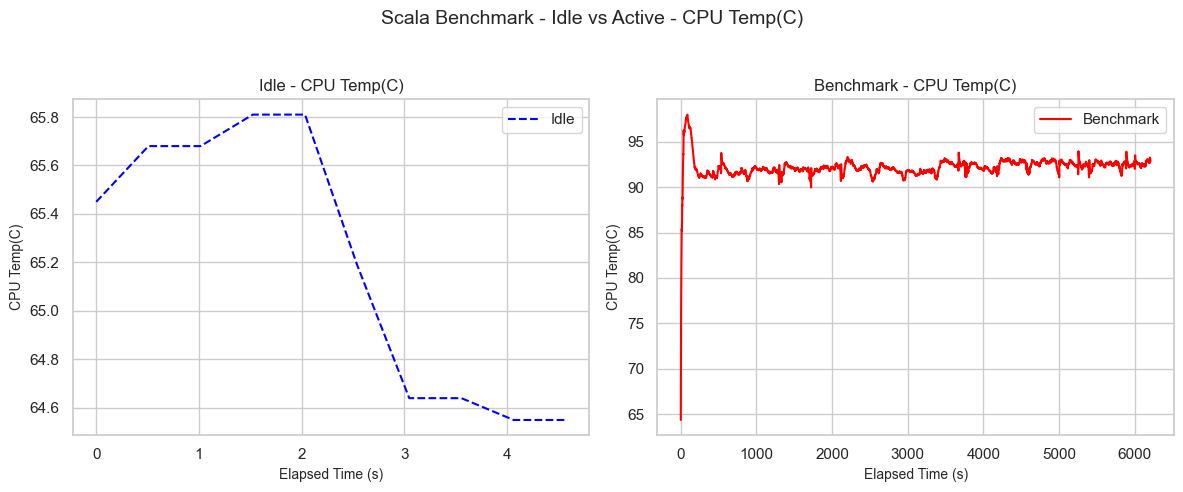

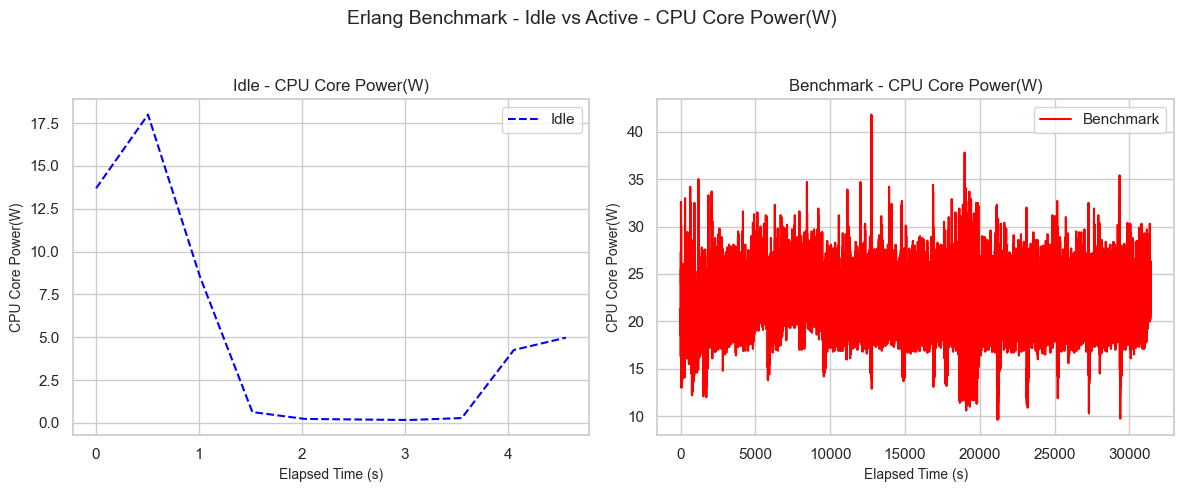

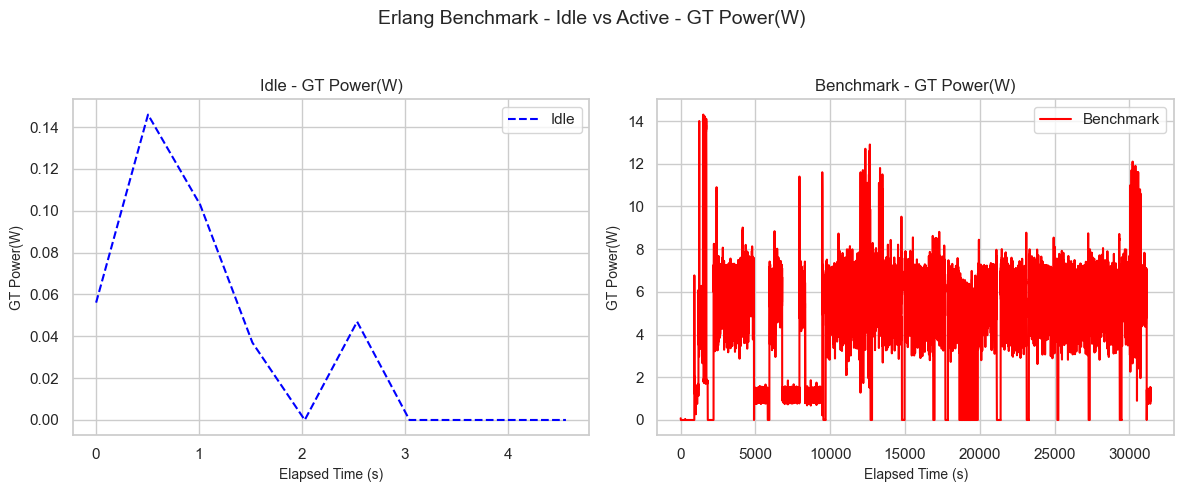

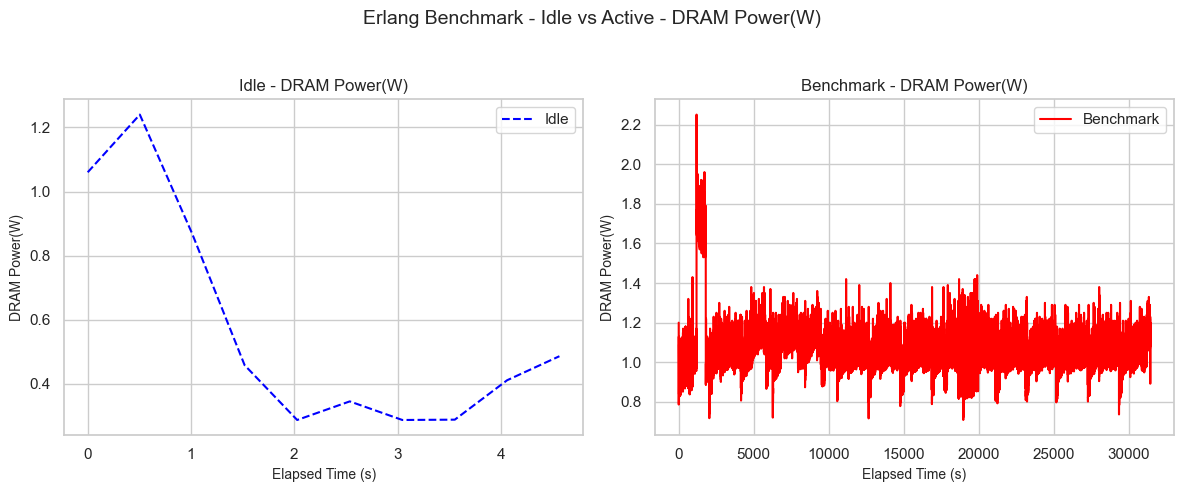

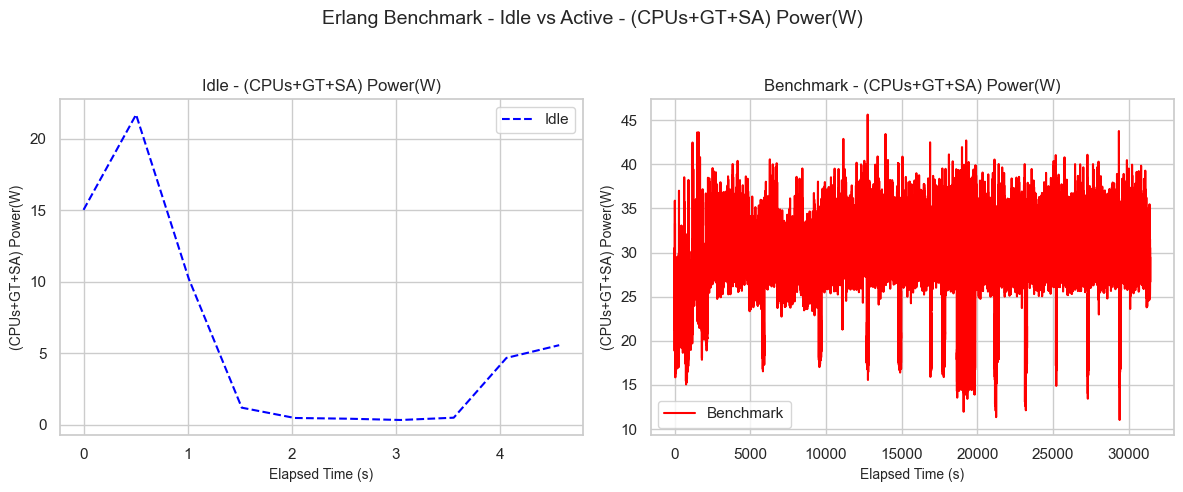

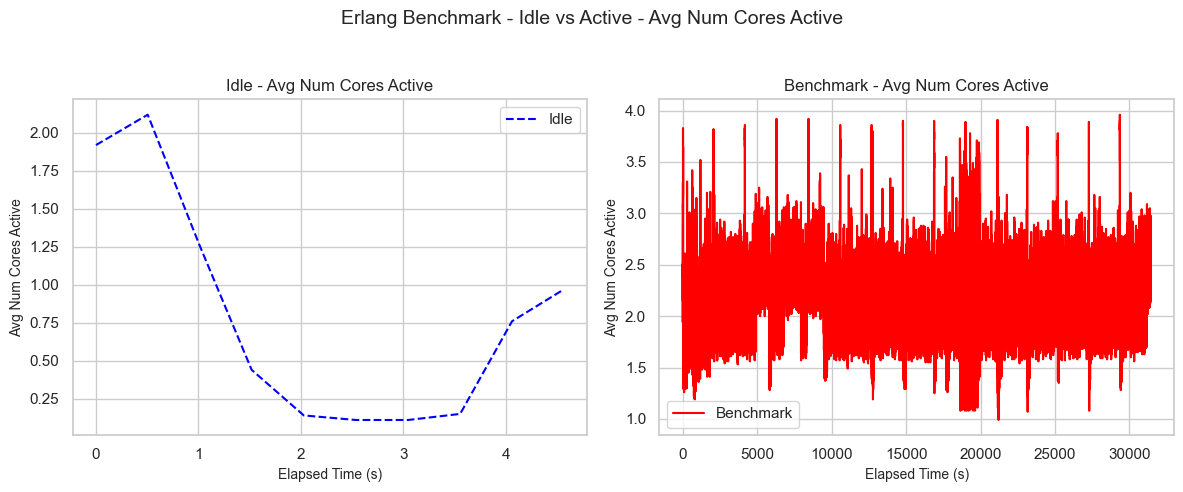

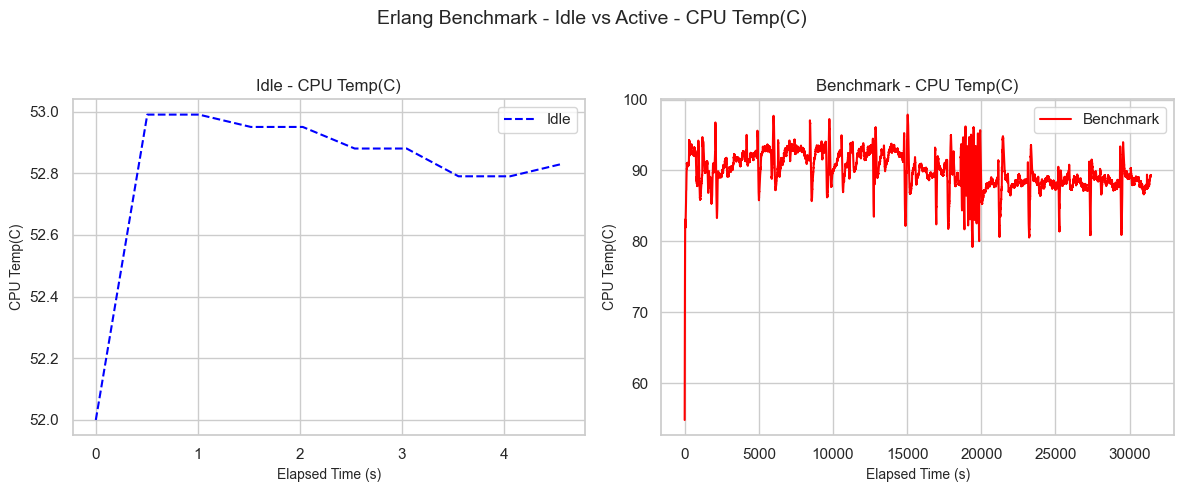

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

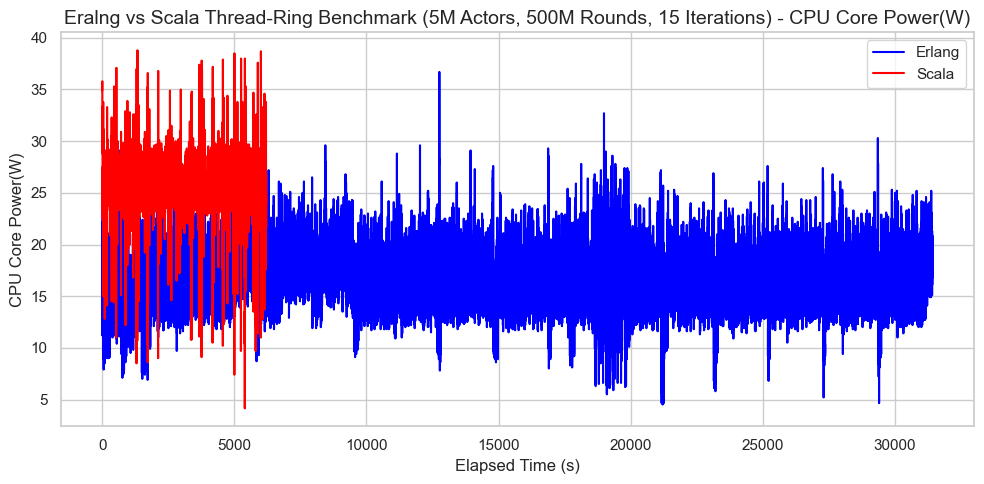

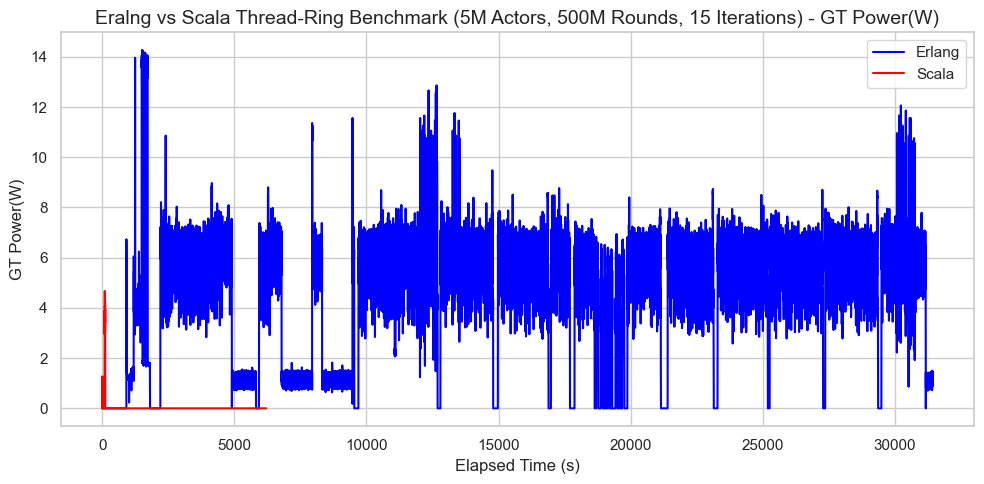

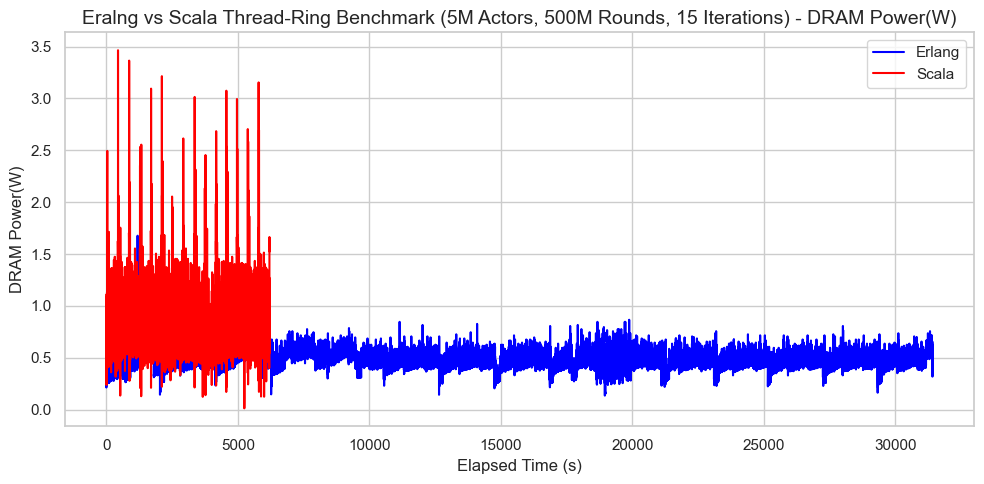

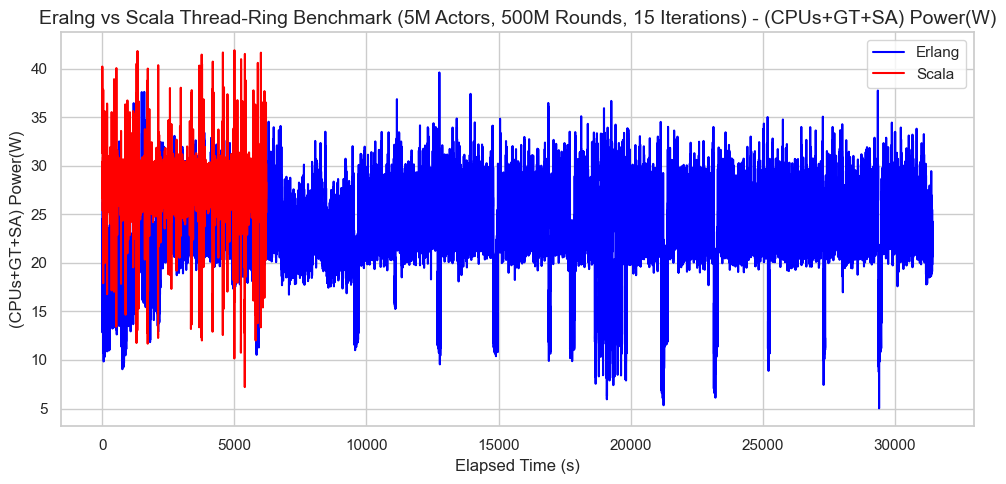

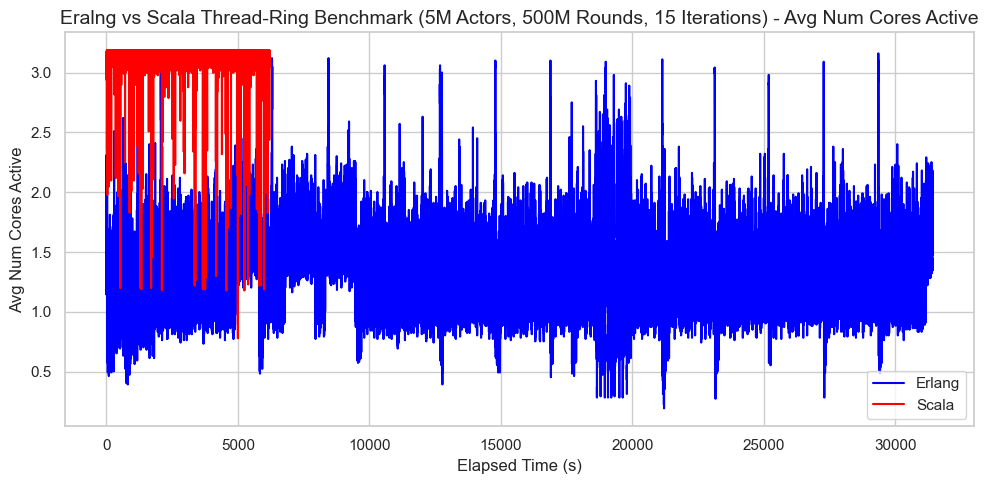

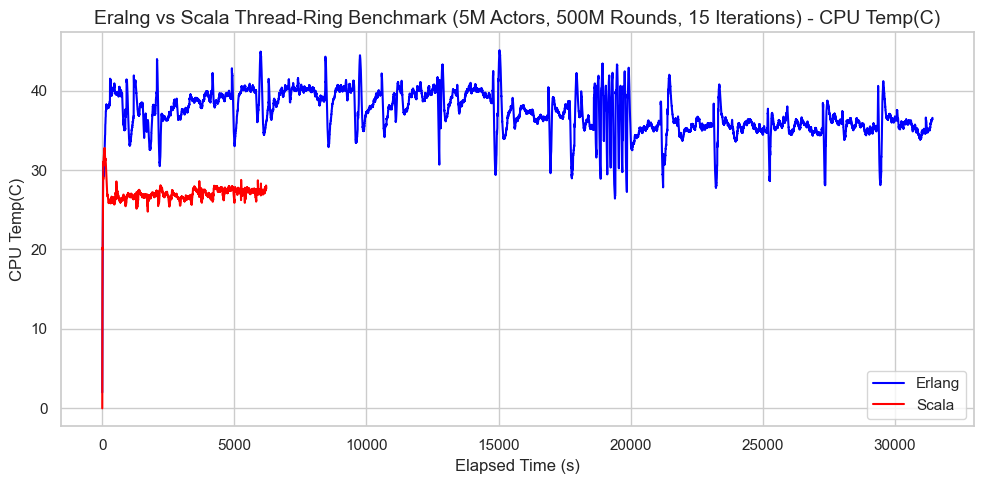

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        25.402346
GT Power(W)              -0.033271
DRAM Power(W)             0.865644
(CPUs+GT+SA) Power(W)    27.843511
CPU Temp(C)              26.983323
Avg Num Cores Active      3.125762
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        15.259270
GT Power(W)               4.716770
DRAM Power(W)             0.459743
(CPUs+GT+SA) Power(W)    22.573998
CPU Temp(C)              37.157058
Avg Num Cores Active      1.204962
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 172876.207392484 Joules
Erlang Benchmark: 709299.7735196505 Joules
